<font color='blue'> **_B01_OBS_01 __________________________________________________________________** </font> 

In [4]:
import sys ; import os ; from pathlib import Path  ; import shutil  ; import pyemu ; import matplotlib.pyplot as plt ; import pandas as pd ; import flopy ; import numpy as np 
_RES  = Path("./_RES/B01")              ; _RES.mkdir(exist_ok=True) ; ref_data  = os.path.join('E:/15_REPOS/02_Beta-Me_GMDSI/_data/GMDSI/monthly_model_files_1lyr_newstress&exe')
TA   = Path("./_RES/B01/TA")           ; TA.mkdir(exist_ok=True)    ; Daily_Truth  = Path('E:/15_REPOS/02_Beta-Me_GMDSI/_data/GMDSI/daily_freyberg_mf6_truth')
TB   = Path("./_RES/B01/TB")           ; TB.mkdir(exist_ok=True)    ; TRU = pd.read_csv(Daily_Truth/'pred_data.csv')                         ; from IPython.display import display_html
TC   = Path("./_RES/B01/TC")           ; TC.mkdir(exist_ok=True)    ; #import xlwings as xw ;wb=xw.Book('E:/15_REPOS/02_Beta-Me_GMDSI/_XLS/_beta_00.xlsx');wb.sheets['0_01'].activate()
OBS1 = pd.read_csv(os.path.join(Daily_Truth,'obs_data.csv'))        ; OBS2 = OBS1.pivot(index='time', columns='site', values='value')    # OBS2.T
OBSH  = pd.read_csv(os.path.join(ref_data   ,'heads.csv' ))         ; OBSQ  = pd.read_csv(os.path.join(ref_data,'sfr.csv'))                    

In [ ]:
a1=OBS1.head(2).style.set_table_attributes("style='display:inline'")  ; a2=OBS2.tail(1).style.set_table_attributes("style='display:inline'")  
a3=OBSH.tail(2).style.set_table_attributes("style='display:inline'")  ; a4=OBSQ.tail(2).style.set_table_attributes("style='display:inline'")  
display_html(a1._repr_html_()+a2._repr_html_()+a4._repr_html_()+a3._repr_html_(),raw=True) ; print('OBS2_Daily=',OBS2.shape)
# a5=TRU.tail(2).style.set_table_attributes("style='display:inline'") ... # to excel ... pd.DataFrame(os.listdir(TA)).to_csv(_RES/"L01_LIST.csv")

site 
 time 
 value 
 
 
 
 
 0 
 GAGE-1 
 3652.500000 
 3405.652701 
 
 
 1 
 GAGE-1 
 3653.500000 
 2461.823847 
 
 
 

 
 
 
 site 
 GAGE-1 
 TRGW-0-26-6 
 TRGW-0-3-8 
 TRGW-2-26-6 
 TRGW-2-3-8 
 
 
 time 
   
   
   
   
   
 
 
 
 
 4383.500000 
 1728.785289 
 34.635324 
 37.358332 
 34.758471 
 37.394710 
 
 
 

 
 
 
   
 time 
 HEADWATER 
 TAILWATER 
 GAGE-1 
 
 
 
 
 23 
 4352.500000 
 -129.828807 
 86.918729 
 542.440846 
 
 
 24 
 4383.500000 
 -127.192506 
 92.911368 
 534.192637 
 
 
 

 
 
 
   
 time 
 TRGW-0-2-15 
 TRGW-0-2-9 
 TRGW-0-3-8 
 TRGW-0-9-1 
 TRGW-0-13-10 
 TRGW-0-15-16 
 TRGW-0-21-10 
 TRGW-0-22-15 
 TRGW-0-24-4 
 TRGW-0-26-6 
 TRGW-0-29-15 
 TRGW-0-33-7 
 TRGW-0-34-10 
 
 
 
 
 23 
 4352.500000 
 34.268676 
 34.895070 
 34.976342 
 35.602397 
 34.027085 
 33.864828 
 33.652849 
 33.684557 
 32.806265 
 33.343362 
 33.640773 
 33.519545 
 33.450758 
 
 
 24 
 4383.500000 
 34.307290 
 34.914951 
 34.990432 
 35.559841 
 34.074068 
 33.915568 
 33.690121 
 33.724907 
 32.792130 
 33.349041 
 33.681996 
 33.551204 
 33.496450

OBS2_Daily= (732, 5)


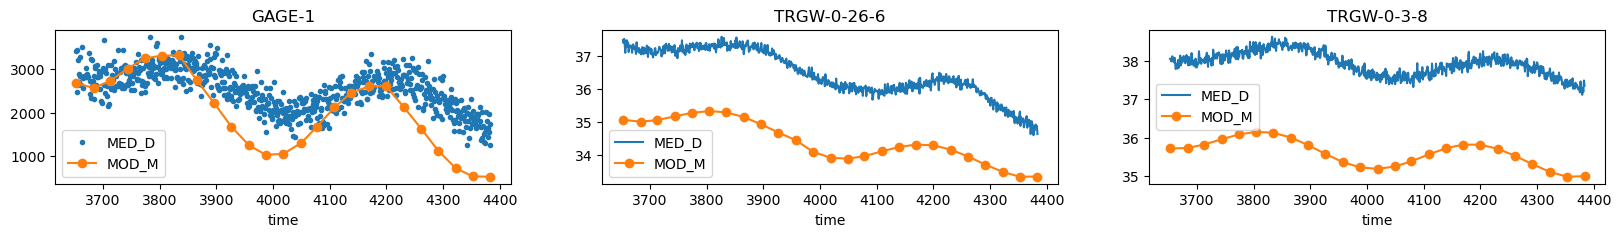

In [6]:
fig = plt.figure(figsize=(20, 2))                             
ax1 = fig.add_subplot(131) ; OBS2.plot(y='GAGE-1'     , ax=ax1, label='MED_D',marker='.', linestyle='none') ; OBSQ.plot(x='time', y='GAGE-1'     ,marker='o', ax=ax1, label='MOD_M') 
ax2 = fig.add_subplot(132) ; OBS2.plot(y='TRGW-0-26-6', ax=ax2, label='MED_D')                              ; OBSH.plot(x='time', y='TRGW-0-26-6',marker='o', ax=ax2, label='MOD_M') 
ax3 = fig.add_subplot(133) ; OBS2.plot(y='TRGW-0-3-8' , ax=ax3, label='MED_D')                              ; OBSH.plot(x='time', y='TRGW-0-3-8' ,marker='o', ax=ax3, label='MOD_M') 
ax1.set_title('GAGE-1');  ax2.set_title('TRGW-0-26-6');  ax3.set_title('TRGW-0-3-8')                        ; plt.show()
OBS1.to_csv(_RES/'_01_daily.csv'); OBS2.to_csv(_RES/'_02_daily.csv')  ; OBSH.to_csv(_RES/'_03_OBSH.csv') ; OBSQ.to_csv(_RES/'_04_OBSQ.csv')   

In [7]:
TI = Path('E:/15_REPOS/02_Beta-Me_GMDSI/_data/GMDSI/U')       ; Times=np.loadtxt(TI/'times.csv', delimiter=',').tolist()  ; print(Times)
OBS1.set_index('site', inplace=True)                          ; obs_sites = OBS1.index.unique().tolist() ; obs_sites

[3652.5, 3683.5, 3712.5, 3743.5, 3773.5, 3804.5, 3834.5, 3865.5, 3896.5, 3926.5, 3957.5, 3987.5, 4018.5, 4049.5, 4077.5, 4108.5, 4138.5, 4169.5, 4199.5, 4230.5, 4261.5, 4291.5, 4322.5, 4352.5, 4383.5]


['GAGE-1', 'TRGW-0-26-6', 'TRGW-2-26-6', 'TRGW-0-3-8', 'TRGW-2-3-8']

In [8]:
%%capture 
simplest_sample = []       # __________________________________________________________________________________________________ simple sample __________________________________
for site in obs_sites:
    SO = OBS1.loc[site,:].copy()
    if isinstance  (SO, pd.Series):            SO.loc["site"] = SO.index.values
    elif isinstance(SO, pd.DataFrame):
        SO.loc[:,"site"] = SO.index.values   ; SO.index = SO.time                                                                       ; SO = SO.reindex(Times,method="nearest")
    simplest_sample.append(SO)
simplest_sample = pd.concat(simplest_sample,axis=0,ignore_index=True)             ; simplest_sample.to_csv (_RES/ "_05a_OBS_simplest_sample.csv")
low_pass_filter = {}       # __________________________________________________________________________________________________ low_pass_filter ____________  mooving average __ 
for site in obs_sites: 
    SO = OBS1.loc[site,:].copy()
    if isinstance(SO, pd.Series):            SO.loc["site"] = SO.index.values
    elif isinstance(SO, pd.DataFrame):
        SO.loc[:,"site"] = SO.index.values ; SO.index = SO.time        ; SM=SO.value.rolling(window=20,center=True,min_periods=1).mean() ; SM = SM.reindex(Times,method="nearest")
    low_pass_filter[site] = SM

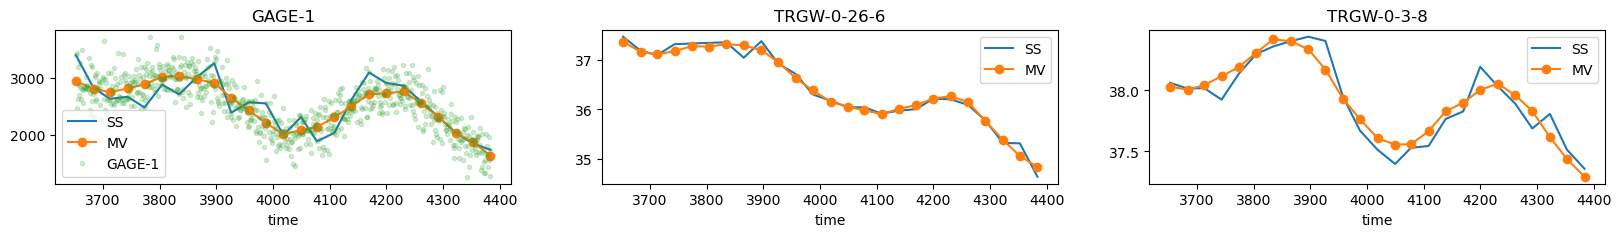

In [9]:
SZ = pd.DataFrame(simplest_sample)  ; SS = SZ.pivot(index='time', columns='site', values='value')  ; SS.to_csv (_RES/ "_05b_OBS_simplest_sample.csv")
MV = pd.DataFrame(low_pass_filter)                                                                 ; MV.to_csv (_RES/  "_06_OBS_moving_average.csv")
fig = plt.figure(figsize=(20, 2))         
ax1 = fig.add_subplot(131) ; SS.plot(y='GAGE-1'     , ax=ax1, label='SS')            ; MV.plot  (y='GAGE-1'     ,marker='o', ax=ax1, label='MV')  
ax2 = fig.add_subplot(132) ; SS.plot(y='TRGW-0-26-6', ax=ax2, label='SS')            ; MV.plot  (y='TRGW-0-26-6',marker='o', ax=ax2, label='MV') 
ax3 = fig.add_subplot(133) ; SS.plot(y='TRGW-0-3-8' , ax=ax3, label='SS')            ; MV.plot  (y='TRGW-0-3-8' ,marker='o', ax=ax3, label='MV') 
ax1.set_title('GAGE-1');  ax2.set_title('TRGW-0-26-6');  ax3.set_title('TRGW-0-3-8') ; OBS2.plot(y='GAGE-1'     ,marker='.', ax=ax1, alpha=0.2, linestyle='none') ; plt.show()

<font color='grey'> **MF6_Load | PEST_Setup_____________________________________________________________________________________________** </font> 

In [10]:
%%capture 
if os.path.exists(TB): shutil.rmtree(TB)                                               
shutil.copytree(ref_data,TB)                                                       
sim = flopy.mf6.MFSimulation.load(sim_ws=TB)  ; gwf=sim.get_model()  ;ib=gwf.dis.idomain.array[0]    
sr  = pyemu.helpers.SpatialReference.from_namfile(os.path.join(TB, "freyberg6.nam") ,delr= gwf.dis.delr.array ,delc=gwf.dis.delc.array)          ; Time = "01-01-2008" 
# _________________________________________
pf  = pyemu.utils.PstFrom (original_d=TB, new_d=TC, remove_existing=True, longnames=True, spatial_reference=sr, zero_based=False, start_datetime = Time, echo=False) 
#shutil.move(TC/'freyberg_mp.ne_layer2.txt', _RES/ 'L04_freyberg_mp.ne_layer2.txt')             ; shutil.move(TC/'freyberg_mp.ne_layer3.txt',_RES/'L04_freyberg_mp.ne_layer3.txt')
pyemu.os_utils.run("mf6",cwd=TC)     ; pyemu.os_utils.run(r'mp7 freyberg_mp.mpsim', cwd=TC)   ; pf.mod_sys_cmds   #  ; pst = pf.build_pst()

<font color='blue'> **OBS _____________________________________________________________________________________________** </font> 

In [11]:
%%capture  
df1  = pd.read_csv(os.path.join(ref_data,'heads.csv'), index_col='time')     ;df1=df1-df1.iloc[0, :]         ;df1.to_csv(TC/'heads.tdiff.csv')           ;INA='heads.tdiff.csv'
df2  = pd.read_csv(os.path.join(ref_data,'sfr.csv')  , index_col='time')     ;df2=df2-df2.iloc[0, :]         ;df2.to_csv(TC/'sfr.tdiff.csv')             ;INB=  'sfr.tdiff.csv'
#pf.add_observations(KF,prefix="hk",zone_array=ib)  ; pst = pf.build_pst()  ;OBS1=len(pst.nnz_obs_names)     # _______________________________________________________ OBS+PAR (Nope)            

DF1 = pd.read_csv(os.path.join(ref_data,"heads.csv"),index_col=0) ;pf.add_observations ("heads.csv",insfile="heads.csv.ins",index_cols="time",use_cols=list(DF1.columns.values) ,prefix="hds" )
DF2 = pd.read_csv(os.path.join(ref_data,"sfr.csv")  ,index_col=0) ;pf.add_observations ("sfr.csv"  ,insfile="sfr.csv.ins"  ,index_cols="time",use_cols=list(DF2.columns.values) ,prefix="sfr" )
OBSH= pd.read_csv(os.path.join(TC,INA) ,index_col=0)              ;pf.add_observations(INA         ,insfile="difh.csv.ins" ,index_cols="time",use_cols=list(OBSH.columns.values),prefix="difh")
OBSQ= pd.read_csv(os.path.join(TC,INB) ,index_col=0)              ;pf.add_observations(INB         ,insfile="difq.csv.ins" ,index_cols="time",use_cols=list(OBSQ.columns.values),prefix="difq")
pst = pf.build_pst()                                              ;#OBS2=len(pst.nnz_obs_names)-OBS1

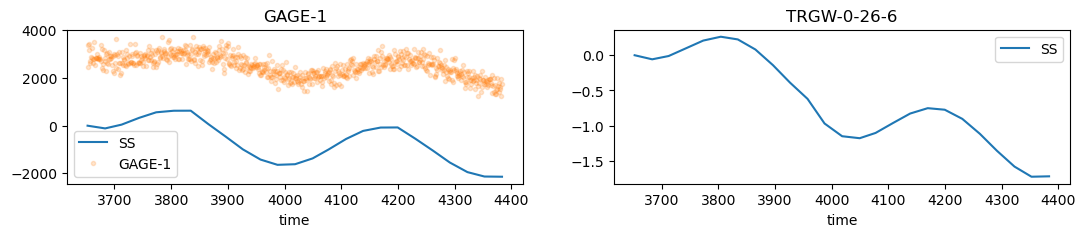

noptmax:0, npar_adj:0, nnz_obs:800


c:\Users\gross.DESKTOP-AIRQM2M\anaconda3\envs\gmdsitut\Lib\site-packages\pyemu\pst\pst_handler.py:1629: PyemuWarning: no adjustable pars


In [12]:
fig = plt.figure(figsize=(20, 2))         
ax1 = fig.add_subplot(131) ; df2.plot(y='GAGE-1', ax=ax1, label='SS') ; ax2 = fig.add_subplot(132)         ; df1.plot(y='TRGW-0-26-6', ax=ax2, label='SS')    
ax1.set_title('GAGE-1')    ; ax2.set_title('TRGW-0-26-6')             ; OBS2.plot(y='GAGE-1',marker='.', ax=ax1, alpha=0.2, linestyle='none') ; plt.show()
pst.write(os.path.join(TC, 'A01.pst'),version=2)   

In [13]:
%%capture  
obs= pst.observation_data;  obs.loc[:, 'weight'] = 0                   ; OBS=obs.loc[obs.oname.isin(['hds', 'sfr']), 'obsnme']
def pst_update(OBSA, OBSB):   
    org_nnz_obs = pst.nnz_obs     ; time_str = OBSB.index.map(lambda x: f"time:{x}").values ;  missing=[]
    for col in OBSB.columns:  
        obs_sufix = col.lower()+"_"+time_str
        for string, oval, time in zip(obs_sufix,OBSB.loc[:,col].values, OBSB.index.values):
                if not any(string in obsnme for obsnme in OBSA):
                    if string.startswith("trgw-2"):
                        pass
                    else: missing.append(string)
                else:
                    obsnme = [ks for ks in OBSA if string in ks] 
                    assert len(obsnme) == 1,string
                    obsnme = obsnme[0]                  ; obs.loc[obsnme,"obsval"] = oval
                    if time > 3652.5 and time <=4018.5:
                        obs.loc[obsnme,"weight"] = 1.0
    if len(missing)==0: print('Number of new nonzero obs:' ,pst.nnz_obs - org_nnz_obs)       ; print('Number of nonzero obs:' ,pst.nnz_obs)  
    else: raise         ValueError('The following obs are missing:\n',missing)               ; return
#pst_update(OBS, MV)       ; 
OBS=obs.loc[obs.oname.isin(['difh', 'difq']), 'obsnme']         ; pst_update(OBS, MV)   #  Update I (H|S) & II (H|S_DIF)

In [14]:
print('nnz_obs_groups=',len(pst.nnz_obs_groups),'obs.weight=',obs.weight.value_counts().tolist())    #;pst.write(os.path.join(TC,'a01.pst'),version=2)  
out_file = "freyberg_mp.mpend"             ; ins_file = out_file + ".ins"  
with open(os.path.join(TC, ins_file),'w') as f:
    f.write("pif ~\n")                     ; f.write("l7 w w w w !part_status! w w !part_time!\n")
pst.add_observations(ins_file=os.path.join(TC, ins_file) , out_file=os.path.join(TC, out_file) ,pst_path='.')            
pst.write(os.path.join(TC,'a01.pst'),version=2)          # pst.observation_data.loc[pst.nnz_obs_names].to_csv (_RES/"_07b_OBSA_Select.csv")

nnz_obs_groups= 3 obs.weight= [764, 36]
2 obs added from instruction file _RES\B01\TC\.\freyberg_mp.mpend.ins
noptmax:0, npar_adj:0, nnz_obs:38


c:\Users\gross.DESKTOP-AIRQM2M\anaconda3\envs\gmdsitut\Lib\site-packages\pyemu\pst\pst_handler.py:1629: PyemuWarning: no adjustable pars


In [ ]:
TRU.set_index('site', inplace=True)       ;forecast = {}       
for site in TRU.index.unique().values: 
    site_obs_data = TRU.loc[site,:].copy()
    if isinstance(site_obs_data, pd.Series):     site_obs_data.loc["site"] = site_obs_data.index.values
    if isinstance(site_obs_data, pd.DataFrame):
        site_obs_data.loc[:,"site"]            = site_obs_data.index.values            ; site_obs_data.index = site_obs_data.time
        sm = site_obs_data.value.rolling(window=20,center=True,min_periods=1).mean()   ; sm_site_obs_data = sm.reindex(Times,method="nearest")
    forecast[site] = sm_site_obs_data
forecasts=[  'oname:sfr_otype:lst_usecol:tailwater_time:4383.5'  ,'oname:sfr_otype:lst_usecol:headwater_time:4383.5'  ,'oname:hds_otype:lst_usecol:trgw-0-9-1_time:4383.5'  ,'part_time']
pst.pestpp_options['forecasts'] = forecasts                      ; obs_data = pd.DataFrame(forecast)                  ; obs_data.to_csv(_RES/'_08_OBS_predata_forecast.csv')
print('forecast:', pst.forecast_names)                           ; # pst.write(os.path.join(TA,'a02.pst'),version=2)

____________________________________ OBS sample ____________________________________
OBS=obs.loc[obs.oname.isin(['hds', 'sfr']), 'obsnme']                                   ; check = 0 ;DA = []   
for IDD in [25,50,75,100,125]:           DA.append(simplest_sample.loc[check:IDD-1])    # simplest_sample.loc[25:50-1]
OBS1.reset_index(inplace=True)                                                          ; check = 0 ;DB = []   
for IDD in [732,1464,2169,2928,3600]:    DB.append(OBS1.loc[check:IDD-1])               # OBS1.loc[1464:2169-1]
print(len(obs), len(OBS), len(DA), len(DB)) #; pd.DataFrame(OBS).to_csv(_RES/'test.csv')                   ; simplest_sample.loc[25:50-1]

____________________________________ particle track ____________________________________
'''obs = pst.observation_data  ; obs_names = [o for o in pst.obs_names if o not in pst.nnz_obs_names]  ; time_str=obs_data.index.map(lambda x: f"time:{x}").values   ;missing=[]
for col in obs_data.columns:
    if col.lower()=='part_time': obs_sufix = col.lower()                                                        
    else: obs_sufix = col.lower()+"_"+time_str
    if type(obs_sufix)==str:         obs_sufix=[obs_sufix]
    for string, oval, time in zip(obs_sufix,obs_data.loc[:,col].values, obs_data.index.values):
            if not any(string in obsnme for obsnme in obs_names): missing.append(string)
            else: 
                obsnme = [ks for ks in obs_names if string in ks] 
                if type(obsnme) == str: obsnme=[obsnme]
                obsnme = obsnme[0]
                if obsnme=='part_time': oval = TRU.loc['part_time', 'value']
                obs.loc[obsnme,"obsval"] = oval'''

<font color='red'> **PAR _____________________________________________________________________________________________** </font> 